##Import Required Libs

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("seaborn-v0_8-darkgrid")  # Use the correct style name for matplotlib >= 3.6
sns.set_palette("muted")

# Load data
data_path = "../data"
tickers = ['AAPL', 'MSFT', 'JNJ', 'PFE']

data = {}
for ticker in tickers:
    file_path = os.path.join(data_path, f"{ticker}.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    df = df[['Close']].rename(columns={'Close': ticker})
    data[ticker] = df

# Merge all tickers into one DataFrame
df_all = pd.concat(data.values(), axis=1)
df_all.dropna(inplace=True)
df_all.head()


,AAPL,MSFT,JNJ,PFE
Date,,,,
NaT,AAPL,MSFT,JNJ,PFE
2015-01-02,24.288578033447266,39.99871063232422,78.01262664794922,19.346155166625977
2015-01-05,23.60433006286621,39.630882263183594,77.46775817871094,19.24118423461914
2015-01-06,23.606552124023438,39.04921340942383,77.08709716796875,19.401735305786133
2015-01-07,23.937578201293945,39.545345306396484,78.78886413574219,19.667253494262695


##Load Results


In [8]:
# Path to results directory
results_dir = "results/"

# Helper function to safely load CSVs
def safe_read_csv(path):
	if not os.path.exists(path):
		print(f"File not found: {path}")
		return None
	return pd.read_csv(path)

# Load forecasted values
arima_preds = safe_read_csv(os.path.join(results_dir, "aapl__lstm_forecasted_prices.csv"))
lstm_preds = safe_read_csv(os.path.join(results_dir, "aapl_forecast.csv"))
true_prices = safe_read_csv(os.path.join(results_dir, "true_prices.csv"))

# Inspect shapes if files loaded successfully
if arima_preds is not None and lstm_preds is not None and true_prices is not None:
	display(arima_preds.head(), lstm_preds.head(), true_prices.head())


,Forecasted_Price
0,251.936462
1,252.268494
2,252.429947
3,252.477600
4,252.450363


,Unnamed: 0,predicted_mean
0,2024-12-31,251.678684
1,2025-01-01,251.725017
2,2025-01-02,251.750094
3,2025-01-03,251.763666
4,2025-01-06,251.771012


,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2015-01-02,24.288578033447266,24.757332388307145,23.848703660119405,24.74622379044572,212818400
2,2015-01-05,23.60433006286621,24.137510563273064,23.41771781993756,24.05753340346533,257142000
3,2015-01-06,23.606552124023438,23.86647704595982,23.24443284626176,23.668756205006424,263188400
4,2015-01-07,23.937578201293945,24.037548847594557,23.70431110001274,23.81539034920668,160423600


In [11]:
df_eval = pd.DataFrame({
    "True": true_prices["Close"].iloc[1:31].astype(float).reset_index(drop=True),
    "ARIMA": arima_preds["Forecasted_Price"].astype(float),
    "LSTM": lstm_preds["predicted_mean"].astype(float)
})
df_eval.head()


,True,ARIMA,LSTM
0,24.288578,251.936462,251.678684
1,23.604330,252.268494,251.725017
2,23.606552,252.429947,251.750094
3,23.937578,252.477600,251.763666
4,24.857306,252.450363,251.771012


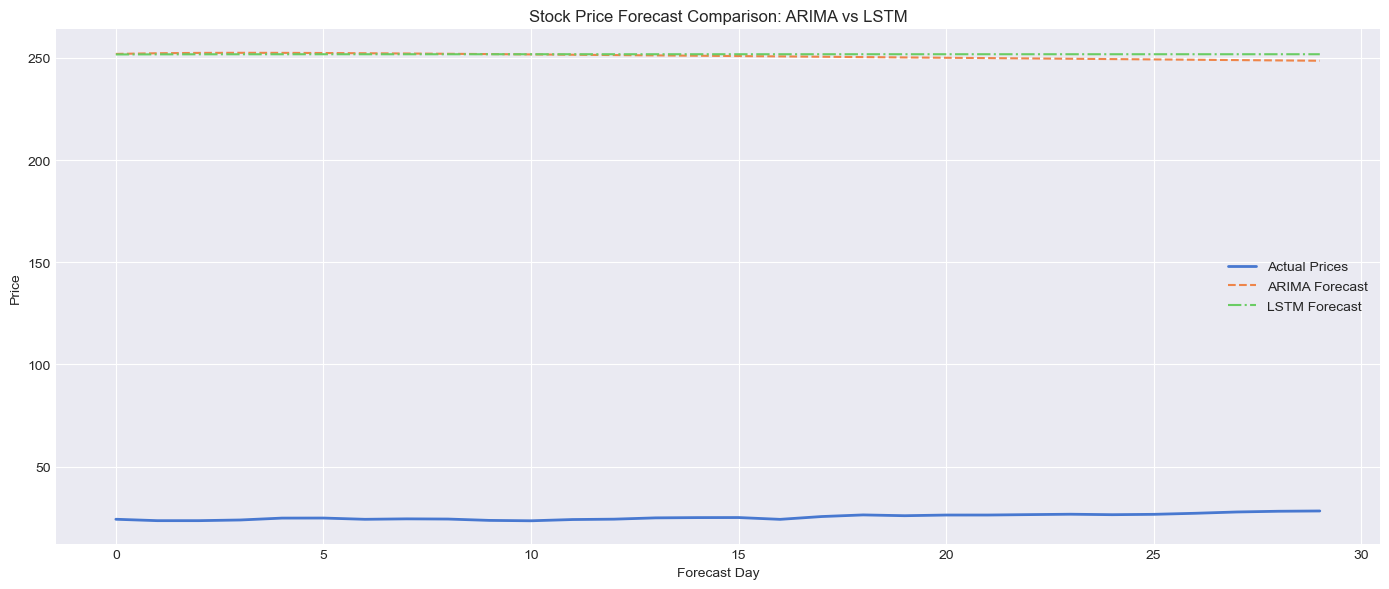

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df_eval["True"], label="Actual Prices", linewidth=2)
plt.plot(df_eval["ARIMA"], label="ARIMA Forecast", linestyle='--')
plt.plot(df_eval["LSTM"], label="LSTM Forecast", linestyle='-.')
plt.title("Stock Price Forecast Comparison: ARIMA vs LSTM")
plt.xlabel("Forecast Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def print_metrics(true, predicted, model_name):
    print(f"\n📌 {model_name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(true, predicted):.4f}")
    print(f"MSE:  {mean_squared_error(true, predicted):.4f}")
    print(f"RMSE: {mean_squared_error(true, predicted, squared=False):.4f}")

print_metrics(df_eval["True"], df_eval["ARIMA"], "ARIMA")
print_metrics(df_eval["True"], df_eval["LSTM"], "LSTM")



📌 ARIMA Evaluation:
MAE:  225.4197
MSE:  50820.8731
RMSE: 225.4349

📌 LSTM Evaluation:
MAE:  226.3567
MSE:  51239.3357
RMSE: 226.3611


c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
